In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread
from tifffile import imsave
from skimage.util import img_as_float
from skimage.color import gray2rgb

In [2]:
bubbles = {}
bubbles['840072_0125'] = (17800, 19900, 3025, 5125)  # (row_min, row_max, col_min, col_max)
bubbles['840069_0048'] = (15500, 17400, 5900, 7800)
bubbles['840031_0055-1'] = (6450, 7050, 7425, 8025)
bubbles['840091_0091-1'] = (9100, 10500, 5500, 6900)
bubbles['840031_0055-2'] = (11600, 13500, 1900, 3600)
bubbles['840091_0091-2'] = (5800, 6900, 2400, 4000)

In [3]:
# output dir
out_dir = '../output/Fig1f-OnlineSupFig1c'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

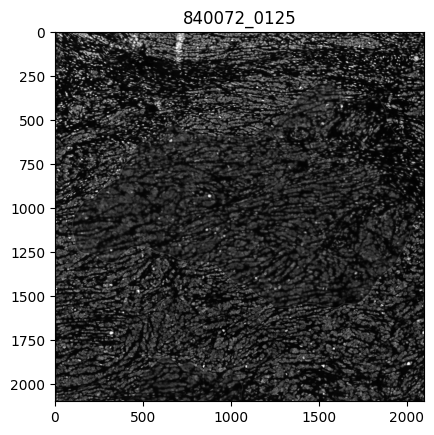

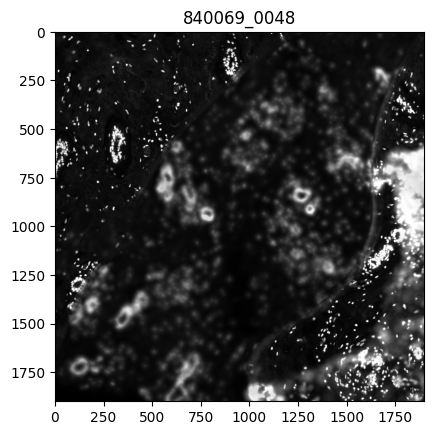

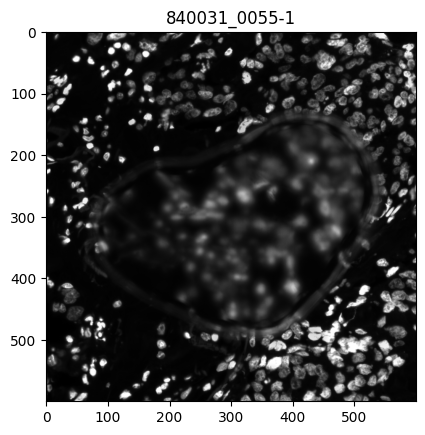

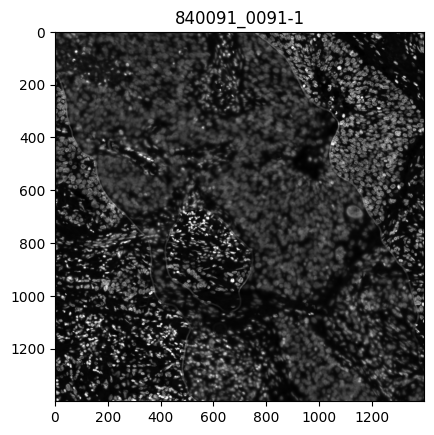

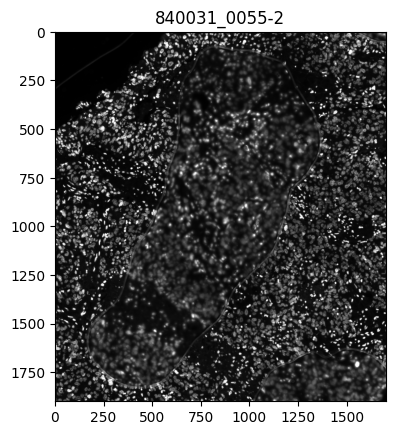

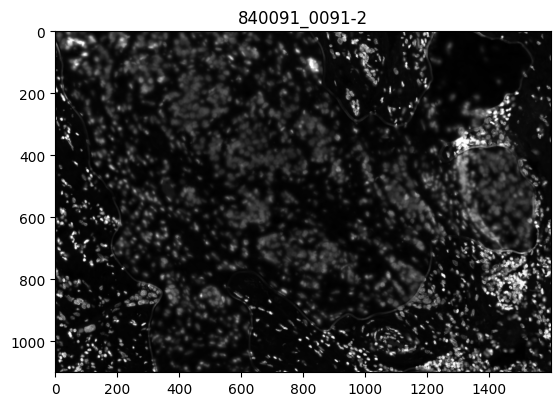

In [4]:
for k, v, in bubbles.items():
    
    k2 = k.split('-')[0]
    
    # assign file path to TOPACIO OME-TIFF
    img_path = (f'/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/{k2}.ome.tif')
    
    dna = imread(img_path, key=0)
    dna = img_as_float(dna)
    dna_crop = dna[v[0]:v[1], v[2]:v[3]]
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1
    
    bottom_cutoff = 0.0
    top_cutoff = 1.0
    dna_crop = np.clip(dna_crop, bottom_cutoff, top_cutoff)
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1

    dna_crop_rgb = gray2rgb(dna_crop)
    
    plt.imshow(dna_crop_rgb, cmap='magma')
    plt.title(k)
    plt.savefig(os.path.join(out_dir, f'{k}.png'), dpi=1000)
    plt.show()
    plt.close('all')